In [762]:
import numpy as np
import pandas as pd
import seaborn as sns
import math as m

from sklearn import linear_model, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, TimeSeriesSplit, \
                                    cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt

%matplotlib inline

In [763]:
import warnings
warnings.filterwarnings('ignore')

In [764]:
train_C2H6 = pd.read_csv('train_data_C2H6.csv', header = 0, sep = ',')
train_C3H8 = pd.read_csv('train_data_C3H8.csv', header = 0, sep = ',')
train_iC4H10 = pd.read_csv('train_data_iC4H10.csv', header = 0, sep = ',')
train_nC4H10 = pd.read_csv('train_data_nC4H10.csv', header = 0, sep = ',')

In [765]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [766]:
train_C2H6

,B_rate,G_A_CH4,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,G_A_iC5H12,G_A_nC5H12,G_A_C6H14,Cx_A_C2H6,Cx_A_C3H8,Cx_A_iC4H10,Cx_A_nC4H10,Re_A,Cx_A_C2H6**2,Pe_ef_C2H6,Pe_ef_C3H8,G_B_C2H6
0,71.591090,0.084380,3.507886,28.822011,12.256473,16.885985,3.126080,3.057606,3.261749,-0.489581,-2.242475,0.181389,0.840950,406691.601290,0.239689,-0.190170,-0.880004,3.261401
1,71.707246,0.085882,3.458369,28.179261,12.278466,17.072465,3.231570,3.179062,3.506462,-0.246485,-1.218358,0.068624,0.481135,404402.122607,0.060755,-0.143749,-0.423507,3.287555
2,71.811607,0.089556,3.520068,28.198436,12.246353,17.025021,3.225281,3.171124,3.521861,-0.170814,-0.395380,0.087099,0.311532,405816.722617,0.029178,0.593639,-0.478033,3.286083
3,71.904943,0.092099,3.589369,28.473852,12.208397,16.906464,3.179006,3.117977,3.435498,-0.233986,-0.463693,0.114547,0.348560,407882.237062,0.054749,4.228007,0.415333,3.287569
4,71.996468,0.091916,3.594282,28.625395,12.207304,16.856159,3.151423,3.087142,3.378656,-0.301800,-0.794489,0.143525,0.452051,408308.687585,0.091083,-0.320362,-2.473751,3.287977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,72.121189,0.218365,3.572406,25.245525,11.661197,17.125750,4.133846,3.641633,4.373171,0.034875,0.584620,-0.127066,0.500455,413983.930391,0.001216,-1.283931,0.457090,3.613900
5794,72.237662,0.215943,3.565468,25.309821,11.678729,17.142614,4.141024,3.646513,4.399564,0.041494,0.542537,-0.123969,0.518442,414147.971365,0.001722,0.105731,0.379239,3.619171
5795,72.362225,0.215254,3.567413,25.362570,11.692550,17.154685,4.146153,3.654012,4.426818,0.053704,0.520633,-0.117063,0.542428,414636.369811,0.002884,0.047468,0.380718,3.627698
5796,72.481486,0.214325,3.570442,25.424037,11.707783,17.166859,4.148601,3.657421,4.447953,0.060286,0.518827,-0.105062,0.572140,415123.962871,0.003634,0.051004,0.363065,3.638930


In [767]:
col_C2H6 = [i for i in train_C2H6.drop('G_B_C2H6',axis=1).columns]

In [768]:
X_C2H6 = train_C2H6.drop('G_B_C2H6',1)
y_C2H6 = train_C2H6['G_B_C2H6']

scaler_C2H6 = StandardScaler()
scaler_C2H6.fit(X_C2H6, y_C2H6)
X_scaled_C2H6 = scaler_C2H6.transform(X_C2H6)

In [769]:
train_C3H8

,B_rate,G_A_CH4,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,G_A_iC5H12,G_A_nC5H12,G_A_C6H14,Re_A,Cx_A_C2H6,Cx_A_C3H8,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,Pe_ef_C2H6,G_B_C3H8
0,71.591090,0.084380,3.507886,28.822011,12.256473,16.885985,3.126080,3.057606,3.261749,406691.601290,-0.489581,-2.242475,5.028694,0.032902,0.707197,-0.190170,27.603653
1,71.707246,0.085882,3.458369,28.179261,12.278466,17.072465,3.231570,3.179062,3.506462,404402.122607,-0.246485,-1.218358,1.484397,0.004709,0.231491,-0.143749,27.783881
2,71.811607,0.089556,3.520068,28.198436,12.246353,17.025021,3.225281,3.171124,3.521861,405816.722617,-0.170814,-0.395380,0.156325,0.007586,0.097052,0.593639,27.734744
3,71.904943,0.092099,3.589369,28.473852,12.208397,16.906464,3.179006,3.117977,3.435498,407882.237062,-0.233986,-0.463693,0.215011,0.013121,0.121494,4.228007,27.679363
4,71.996468,0.091916,3.594282,28.625395,12.207304,16.856159,3.151423,3.087142,3.378656,408308.687585,-0.301800,-0.794489,0.631212,0.020599,0.204350,-0.320362,27.624403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,72.121189,0.218365,3.572406,25.245525,11.661197,17.125750,4.133846,3.641633,4.373171,413983.930391,0.034875,0.584620,0.341780,0.016146,0.250456,-1.283931,25.788062
5794,72.237662,0.215943,3.565468,25.309821,11.678729,17.142614,4.141024,3.646513,4.399564,414147.971365,0.041494,0.542537,0.294347,0.015368,0.268782,0.105731,25.830453
5795,72.362225,0.215254,3.567413,25.362570,11.692550,17.154685,4.146153,3.654012,4.426818,414636.369811,0.053704,0.520633,0.271058,0.013704,0.294229,0.047468,25.881397
5796,72.481486,0.214325,3.570442,25.424037,11.707783,17.166859,4.148601,3.657421,4.447953,415123.962871,0.060286,0.518827,0.269181,0.011038,0.327344,0.051004,25.950659


In [770]:
col_C3H8 = [i for i in train_C3H8.drop('G_B_C3H8',axis=1).columns]

In [771]:
X_C3H8 = train_C3H8.drop('G_B_C3H8',1)
y_C3H8 = train_C3H8['G_B_C3H8']

scaler_C3H8 = StandardScaler()
scaler_C3H8.fit(X_C3H8, y_C3H8)
X_scaled_C3H8 = scaler_C3H8.transform(X_C3H8)

In [772]:
train_iC4H10

,B_rate,G_A_CH4,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,G_A_iC5H12,G_A_nC5H12,G_A_C6H14,Re_A,Cx_A_C2H6,Cx_A_C3H8,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,Pe_ef_C2H6,G_B_iC4H10
0,71.591090,0.084380,3.507886,28.822011,12.256473,16.885985,3.126080,3.057606,3.261749,406691.601290,-0.489581,-2.242475,5.028694,0.032902,0.707197,-0.190170,12.325097
1,71.707246,0.085882,3.458369,28.179261,12.278466,17.072465,3.231570,3.179062,3.506462,404402.122607,-0.246485,-1.218358,1.484397,0.004709,0.231491,-0.143749,12.365565
2,71.811607,0.089556,3.520068,28.198436,12.246353,17.025021,3.225281,3.171124,3.521861,405816.722617,-0.170814,-0.395380,0.156325,0.007586,0.097052,0.593639,12.360900
3,71.904943,0.092099,3.589369,28.473852,12.208397,16.906464,3.179006,3.117977,3.435498,407882.237062,-0.233986,-0.463693,0.215011,0.013121,0.121494,4.228007,12.351922
4,71.996468,0.091916,3.594282,28.625395,12.207304,16.856159,3.151423,3.087142,3.378656,408308.687585,-0.301800,-0.794489,0.631212,0.020599,0.204350,-0.320362,12.340423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,72.121189,0.218365,3.572406,25.245525,11.661197,17.125750,4.133846,3.641633,4.373171,413983.930391,0.034875,0.584620,0.341780,0.016146,0.250456,-1.283931,11.537228
5794,72.237662,0.215943,3.565468,25.309821,11.678729,17.142614,4.141024,3.646513,4.399564,414147.971365,0.041494,0.542537,0.294347,0.015368,0.268782,0.105731,11.561665
5795,72.362225,0.215254,3.567413,25.362570,11.692550,17.154685,4.146153,3.654012,4.426818,414636.369811,0.053704,0.520633,0.271058,0.013704,0.294229,0.047468,11.587488
5796,72.481486,0.214325,3.570442,25.424037,11.707783,17.166859,4.148601,3.657421,4.447953,415123.962871,0.060286,0.518827,0.269181,0.011038,0.327344,0.051004,11.616500


In [773]:
col_iC4H10 = [i for i in train_iC4H10.drop('G_B_iC4H10',axis=1).columns]

In [774]:
X_iC4H10 = train_iC4H10.drop('G_B_iC4H10',1)
y_iC4H10 = train_iC4H10['G_B_iC4H10']

scaler_iC4H10 = StandardScaler()
scaler_iC4H10.fit(X_iC4H10, y_iC4H10)
X_scaled_iC4H10 = scaler_iC4H10.transform(X_iC4H10)

In [775]:
train_nC4H10

,B_rate,G_A_CH4,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,G_A_iC5H12,G_A_nC5H12,G_A_C6H14,Re_A,Cx_A_C2H6,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,Pe_ef_C2H6,G_B_nC4H10
0,71.591090,0.084380,3.507886,28.822011,12.256473,16.885985,3.126080,3.057606,3.261749,406691.601290,-0.489581,5.028694,0.032902,0.707197,-0.190170,17.367120
1,71.707246,0.085882,3.458369,28.179261,12.278466,17.072465,3.231570,3.179062,3.506462,404402.122607,-0.246485,1.484397,0.004709,0.231491,-0.143749,17.383997
2,71.811607,0.089556,3.520068,28.198436,12.246353,17.025021,3.225281,3.171124,3.521861,405816.722617,-0.170814,0.156325,0.007586,0.097052,0.593639,17.373582
3,71.904943,0.092099,3.589369,28.473852,12.208397,16.906464,3.179006,3.117977,3.435498,407882.237062,-0.233986,0.215011,0.013121,0.121494,4.228007,17.358515
4,71.996468,0.091916,3.594282,28.625395,12.207304,16.856159,3.151423,3.087142,3.378656,408308.687585,-0.301800,0.631212,0.020599,0.204350,-0.320362,17.339268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,72.121189,0.218365,3.572406,25.245525,11.661197,17.125750,4.133846,3.641633,4.373171,413983.930391,0.034875,0.341780,0.016146,0.250456,-1.283931,17.644192
5794,72.237662,0.215943,3.565468,25.309821,11.678729,17.142614,4.141024,3.646513,4.399564,414147.971365,0.041494,0.294347,0.015368,0.268782,0.105731,17.685043
5795,72.362225,0.215254,3.567413,25.362570,11.692550,17.154685,4.146153,3.654012,4.426818,414636.369811,0.053704,0.271058,0.013704,0.294229,0.047468,17.726825
5796,72.481486,0.214325,3.570442,25.424037,11.707783,17.166859,4.148601,3.657421,4.447953,415123.962871,0.060286,0.269181,0.011038,0.327344,0.051004,17.763570


In [776]:
col_nC4H10 = [i for i in train_nC4H10.drop('G_B_nC4H10', axis=1).columns]

In [777]:
X_nC4H10 = train_nC4H10.drop('G_B_nC4H10',1)
y_nC4H10 = train_nC4H10['G_B_nC4H10']

scaler_nC4H10 = StandardScaler()
scaler_nC4H10.fit(X_nC4H10, y_nC4H10)
X_scaled_nC4H10 = scaler_nC4H10.transform(X_nC4H10)

## Кросс валидация

Обучение / тест

In [778]:
X_train_C2H6, X_test_C2H6, y_train_C2H6, y_test_C2H6 = train_test_split(
    X_scaled_C2H6, y_C2H6, test_size=0.2, shuffle=False, random_state=0)

In [779]:
X_train_C3H8, X_test_C3H8, y_train_C3H8, y_test_C3H8 = train_test_split(
    X_scaled_C3H8, y_C3H8, test_size=0.2, shuffle=False, random_state=0)

In [780]:
X_train_iC4H10, X_test_iC4H10, y_train_iC4H10, y_test_iC4H10 = train_test_split(
    X_scaled_iC4H10, y_iC4H10, test_size=0.2, shuffle=False, random_state=0)

In [781]:
X_train_nC4H10, X_test_nC4H10, y_train_nC4H10, y_test_nC4H10 = train_test_split(
    X_scaled_nC4H10, y_nC4H10, test_size=0.2, shuffle=False, random_state=0)

Стратегии кросс-валидации

In [782]:
cv_strategy_KFold = KFold(n_splits=5, random_state=0, shuffle=False)
cv_strategy_TMS = TimeSeriesSplit(n_splits=5)

Загружаем метрику качества

In [783]:
scorer = metrics.make_scorer(metrics.mean_absolute_error)
scorerCV = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=False)

# linear_regressor

### C2H6

In [784]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = linear_regressor.predict(X_test_C2H6)

In [785]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.1411017204012408

In [786]:
lr_scoring = cross_val_score(linear_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.015971444975038072, max:0.022751829626547756, min:0.012792911400252082, std:0.003484326687108236


In [787]:
lr_scoring

array([0.01279291, 0.02275183, 0.0147447 , 0.01439627, 0.01517152])

In [788]:
lr_scoring = cross_val_score(linear_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:0.04000994711306642, max:0.11890950032280521, min:0.0158844125042031, std:0.040009364499008694


In [789]:
lr_scoring

array([0.1189095 , 0.03319644, 0.01588441, 0.0158955 , 0.01616388])

### C3H8

In [790]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = linear_regressor.predict(X_test_C3H8)

In [791]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

0.1332813044848852

In [792]:
lr_scoring = cross_val_score(linear_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.4109788824414841, max:1.7142595438084451, min:0.05682510550449333, std:0.651954474556587


In [793]:
lr_scoring

array([0.11957753, 1.71425954, 0.07755439, 0.05682511, 0.08667785])

In [794]:
lr_scoring = cross_val_score(linear_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:0.41820284095611593, max:1.300638020119127, min:0.07849468704939058, std:0.47589925599312205


In [795]:
lr_scoring

array([1.30063802, 0.54287917, 0.07849469, 0.08946226, 0.07954006])

### iC4H10

In [796]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = linear_regressor.predict(X_test_iC4H10)

In [797]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.6141298723717853

In [798]:
lr_scoring = cross_val_score(linear_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.3675913013521162, max:1.0546991892256214, min:0.1466673165425363, std:0.3471909351945689


In [799]:
lr_scoring

array([0.16595751, 1.05469919, 0.17993798, 0.14666732, 0.29069451])

In [800]:
lr_scoring = cross_val_score(linear_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:2.9840791145934302, max:13.769237875869873, min:0.15006697824592044, std:5.393418691617371


In [801]:
lr_scoring

array([13.76923788,  0.44892691,  0.15006698,  0.28142694,  0.27073687])

### nC4H10

In [802]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = linear_regressor.predict(X_test_nC4H10)

In [803]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

0.8263762856215437

In [804]:
lr_scoring = cross_val_score(linear_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.8836778718604801, max:3.159449358440867, min:0.23690889177742427, std:1.139226782249079


In [805]:
lr_scoring

array([0.34318462, 3.15944936, 0.27949337, 0.23690889, 0.39935312])

In [806]:
lr_scoring = cross_val_score(linear_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:1.6053901677858373, max:6.356411773227134, min:0.2538187905326286, std:2.378955100723231


In [807]:
lr_scoring

array([6.35641177, 0.64426642, 0.35699936, 0.25381879, 0.4154545 ])

# lasso_regressor

### C2H6

In [808]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = lasso_regressor.predict(X_test_C2H6)

In [809]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.160635055064188

In [810]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:0.7431949448300507, max:1.3573229747620663, min:0.3229540113770405, std:0.40391486329641535


In [811]:
ls_scoring

array([1.35732297, 1.08545115, 0.49874817, 0.45149841, 0.32295401])

In [812]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [813]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [814]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [815]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 1.52 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [816]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [817]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6786479709017618
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [818]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.0297718978917803

In [819]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [820]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 1.39 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [821]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [822]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6279262998268353
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [823]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.0297718978917803

### C3H8

In [824]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = lasso_regressor.predict(X_test_C3H8)

In [825]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.6651071559158253

In [826]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:2.8340178193781633, max:10.194233284580378, min:0.32335360285457354, std:3.700276798721592


In [827]:
ls_scoring

array([ 1.1708592 , 10.19423328,  1.50670667,  0.3233536 ,  0.97493633])

In [828]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:2.6085598588536594, max:7.7018155776801835, min:0.4550719728421791, std:2.7708008522194953


In [829]:
ls_scoring

array([7.70181558, 3.43963257, 0.45507197, 0.66140679, 0.78487239])

In [830]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [831]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [832]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [833]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 1.31 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [834]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [835]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-2.231794099728587
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [836]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.713296449045317

In [837]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [838]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 1.74 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [839]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [840]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-2.5879279272760085
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [841]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.713296449045317

### iC4H10

In [842]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = lasso_regressor.predict(X_test_iC4H10)

In [843]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.9333868510046126

In [844]:
ls_scoring = cross_val_score(lasso_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:1.2810734123288263, max:4.572704732033658, min:0.3129721481235549, std:1.6487256615879988


In [845]:
ls_scoring

array([0.57105206, 4.57270473, 0.55674856, 0.31297215, 0.39188956])

In [846]:
ls_scoring = cross_val_score(lasso_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:1.1955246776471986, max:2.868031934677872, min:0.23358410938260632, std:1.097339804988711


In [847]:
ls_scoring

array([2.86803193, 2.14807619, 0.30140522, 0.23358411, 0.42652594])

In [848]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [849]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [850]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [851]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 1.25 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [852]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [853]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.1649954424692102
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [854]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8342777944462326

In [855]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [856]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 1.69 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [857]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [858]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.0942871461715735
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [859]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8342777944462326

### nC4H10

In [860]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = lasso_regressor.predict(X_test_nC4H10)

In [861]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.3133927241337715

In [862]:
ls_scoring = cross_val_score(lasso_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:1.5798065016917804, max:6.395014553392381, min:0.2913427543876322, std:2.408030512879343


In [863]:
ls_scoring

array([0.42342055, 6.39501455, 0.38569659, 0.29134275, 0.40355806])

In [864]:
ls_scoring = cross_val_score(lasso_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:1.5246081416351756, max:3.8607101479163926, min:0.2396636221198513, std:1.5213304330213762


In [865]:
ls_scoring

array([3.86071015, 2.82393475, 0.23966362, 0.2683134 , 0.43041879])

In [866]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [867]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [868]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [869]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 1.22 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [870]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [871]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.5023987983717684
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [872]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.1919196697303216

In [873]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [874]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 1.65 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [875]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [876]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.4391791652724912
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [877]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.1919196697303216

# Ridge regressor

### C2H6

In [878]:
ridge_regressor = linear_model.Ridge(random_state=0)
ridge_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = ridge_regressor.predict(X_test_C2H6)

In [879]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.08581123691234961

In [880]:
rd_scoring = cross_val_score(ridge_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.020314776624520088, max:0.03622633780472033, min:0.013252055416190532, std:0.008287019410416036


In [881]:
rd_scoring

array([0.01325206, 0.03622634, 0.01658368, 0.01517745, 0.02033437])

In [882]:
rd_scoring = cross_val_score(ridge_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.1415729949687497, max:0.6108440385319867, min:0.015666224338671896, std:0.23485739037820189


In [883]:
rd_scoring

array([0.61084404, 0.04372612, 0.01566622, 0.01672449, 0.0209041 ])

In [884]:
ridge_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [885]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [886]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [887]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 1.41 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [888]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [889]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6786479709017618
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [890]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.0297718978917803

In [891]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [892]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 1.32 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [893]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [894]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6279262998268353
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [895]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.0297718978917803

### C3H8

In [896]:
ridge_regressor = linear_model.Ridge(random_state=0)
ridge_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = ridge_regressor.predict(X_test_C3H8)

In [897]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

0.12172644671690373

In [898]:
rd_scoring = cross_val_score(ridge_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.3429230532843558, max:1.2571947147011742, min:0.06113539082045392, std:0.45888074603374995


In [899]:
rd_scoring

array([0.08276538, 1.25719471, 0.17357174, 0.06113539, 0.13994804])

In [901]:
rd_scoring = cross_val_score(ridge_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.6644854523952589, max:2.026274891146523, min:0.11980146709834279, std:0.7213406544451069


In [902]:
rd_scoring

array([2.02627489, 0.77797615, 0.15109453, 0.24728022, 0.11980147])

In [903]:
ridge_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [904]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [905]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [906]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 1.26 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [907]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [908]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-2.231794099728587
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [909]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.713296449045317

In [910]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [911]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 1.68 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [912]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [913]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-2.5879279272760085
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [914]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.713296449045317

### iC4H10

In [915]:
ridge_regressor = linear_model.Ridge(random_state=0)
ridge_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = ridge_regressor.predict(X_test_iC4H10)

In [916]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.5800300416872558

In [917]:
rd_scoring = cross_val_score(ridge_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.3010038448412721, max:0.7487256948250158, min:0.14275425236879388, std:0.22918212250846706


In [918]:
rd_scoring

array([0.15702868, 0.74872569, 0.17435313, 0.14275425, 0.28215747])

In [919]:
rd_scoring = cross_val_score(ridge_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.7637356676681971, max:2.1404487329784163, min:0.1583640452228991, std:0.7399864571156076


In [920]:
rd_scoring

array([2.14044873, 0.93665792, 0.15836405, 0.305151  , 0.27805664])

In [921]:
ridge_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [922]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [923]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [924]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 1.22 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [925]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [926]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.1649954424692102
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [927]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8342777944462326

In [928]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [929]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 1.72 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [930]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [931]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.0942871461715735
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [932]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8342777944462326

### nC4H10

In [933]:
ridge_regressor = linear_model.Ridge(random_state=0)
ridge_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = ridge_regressor.predict(X_test_nC4H10)

In [934]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

0.8084511195820306

In [936]:
rd_scoring = cross_val_score(ridge_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.6985641913322673, max:2.2495126788110404, min:0.2304903346043223, std:0.7786180173676278


In [937]:
rd_scoring

array([0.28781111, 2.24951268, 0.28470896, 0.23049033, 0.44029788])

In [938]:
rd_scoring = cross_val_score(ridge_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(rd_scoring .mean(), rd_scoring .max(), 
                                                     rd_scoring .min(), rd_scoring .std()))

LR (KFold)) mean:0.8894471075549573, max:2.2042944321813716, min:0.22679549461086654, std:0.7394310640114422


In [939]:
rd_scoring

array([2.20429443, 1.19918674, 0.34821999, 0.22679549, 0.46873888])

In [940]:
ridge_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [941]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [942]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [943]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 1.27 s


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [944]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=1e-05, warm_start=False)

In [945]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.5023987983717684
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [946]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.1919196697303216

In [947]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [948]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 1.69 s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=0)

In [949]:
grid_cv.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=500, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.001, warm_start=False)

In [950]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.4391791652724912
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [951]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.1919196697303216

# SGDRegressor

### C2H6

In [952]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = SGD_regressor.predict(X_test_C2H6)

In [953]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.8478060950342744

In [954]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:0.255756352325725, max:0.6022244158682105, min:0.08979590230266159, std:0.18784390205339088


In [955]:
SGD_scoring

array([0.09122728, 0.60222442, 0.27645675, 0.0897959 , 0.21907741])

In [956]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:1.4314016933080709, max:5.55504640525066, min:0.08409136843193281, std:2.0949739905135156


In [957]:
SGD_scoring

array([5.55504641, 1.11122955, 0.08409137, 0.14849087, 0.25815027])

In [958]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [959]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [960]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [961]:
%%time
randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 12.6 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          sh...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 

In [962]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.2, random_state=0,
             shuffle=False, tol=1.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [963]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-0.1822422551929618
{'tol': 1.5, 'power_t': 0.2, 'penalty': 'l1', 'eta0': 0.05, 'alpha': 0.001}


In [964]:
predictions = randomized_grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.8811763436088057

In [965]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [966]:
%%time
randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 9.75 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          s...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0

In [967]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.2, random_state=0,
             shuffle=False, tol=1.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [968]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-1.2338849956160856
{'tol': 1.5, 'power_t': 0.2, 'penalty': 'l1', 'eta0': 0.05, 'alpha': 0.001}


In [969]:
predictions = randomized_grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.8811763436088057

### C3H8

In [970]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = SGD_regressor.predict(X_test_C3H8)

In [971]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

0.7089323577583341

In [972]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:2.6157859344866923, max:11.164407931869423, min:0.25890491261973614, std:4.277099194590597


In [973]:
SGD_scoring

array([ 0.40395695, 11.16440793,  0.73076852,  0.25890491,  0.52089135])

In [974]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:8.626078995728617, max:37.18964402390814, min:0.3812521811104615, std:14.372529031373046


In [975]:
SGD_scoring

array([37.18964402,  4.60539672,  0.39238168,  0.56172037,  0.38125218])

In [976]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [977]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [978]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV, 
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [979]:
%%time
randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 16.9 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          sh...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 

In [980]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.2, random_state=0,
             shuffle=False, tol=1, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [981]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-3.405971293942425
{'tol': 1, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [982]:
predictions = randomized_grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

2.291174996207619

In [983]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV, 
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [984]:
%%time
randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 12.4 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          s...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0

In [985]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.2, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [986]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-10.79757976348603
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [987]:
predictions = randomized_grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

2.291174996207619

### iC4H10

In [988]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = SGD_regressor.predict(X_test_iC4H10)

In [989]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.7350356080241307

In [990]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:1.4592797395272596, max:6.452016241977674, min:0.17320475484401743, std:2.4965662100437878


In [991]:
SGD_scoring

array([0.19141364, 6.45201624, 0.17320475, 0.21284905, 0.26691501])

In [992]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:4.441813212986362, max:19.636747655751137, min:0.12271268644141113, std:7.629867558003696


In [993]:
SGD_scoring

array([19.63674766,  1.99939141,  0.16557357,  0.12271269,  0.28464075])

In [994]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [995]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [996]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [997]:
%%time
randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 14.9 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          sh...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 

In [998]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.2, random_state=0,
             shuffle=False, tol=1, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [999]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-1.5980906472246414
{'tol': 1, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [1000]:
predictions = randomized_grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

1.133922808374102

In [1001]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [1002]:
%%time
randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 10.8 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          s...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0

In [1003]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.2, random_state=0,
             shuffle=False, tol=1, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [1004]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-5.115411871031451
{'tol': 1, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [1005]:
predictions = randomized_grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

1.133922808374102

### nC4H10

In [1006]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = SGD_regressor.predict(X_test_nC4H10)

In [1007]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.056486374241972

In [1008]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:1.5601519862697732, max:6.5357374092735725, min:0.24028446579593274, std:2.4883835771533698


In [1009]:
SGD_scoring

array([0.24028447, 6.53573741, 0.30252839, 0.31253375, 0.40967592])

In [1010]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:5.998523648324712, max:27.329723599763152, min:0.3072336021107777, std:10.673626747805825


In [1011]:
SGD_scoring

array([27.3297236 ,  1.46076856,  0.3072336 ,  0.43126045,  0.46363202])

In [1012]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [1013]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [1014]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [1015]:
%%time
randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 15.5 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          sh...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 

In [1016]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.2, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [1017]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-1.847020719106619
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [1018]:
predictions = randomized_grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

0.7908717102450441

In [1019]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [1020]:
%%time
randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 12.4 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=0,
                                          s...
                                          warm_start=False),
                   iid='warn', n_iter=200, n_jobs=None,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0

In [1021]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.05, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.2, random_state=0,
             shuffle=False, tol=0.5, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [1022]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-6.7747328189691505
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [1023]:
predictions = randomized_grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

0.7908717102450441

# GradientBoostingRegressor

### C2H6

In [189]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_C2H6, y_train_C2H6)
predictions = estimator.predict(X_test_C2H6)

In [190]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

1.939360895455012

In [191]:
GBR_scoring = cross_val_score(estimator, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.5593182852215015, max:1.0360100217048316, min:0.25284684086654813, std:0.25989936500215416


In [192]:
GBR_scoring

array([0.56713064, 1.03601002, 0.45200172, 0.25284684, 0.4886022 ])

In [193]:
GBR_scoring = cross_val_score(estimator, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:0.5788642716645688, max:1.367452491755013, min:0.21290356802529675, std:0.4191321989856376


In [194]:
GBR_scoring

array([1.36745249, 0.5279375 , 0.23350508, 0.21290357, 0.55252272])

In [195]:
estimator.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [196]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [197]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [198]:
#%%time
#randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

In [199]:
#randomized_grid_cv.best_estimator_

In [200]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [201]:
#predictions = randomized_grid_cv.predict(X_test_C2H6)
#metrics.mean_absolute_error(y_test_C2H6, predictions)

In [202]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [203]:
#%%time
#randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

In [204]:
#randomized_grid_cv.best_estimator_

In [205]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [206]:
#predictions = randomized_grid_cv.predict(X_test_C2H6)
#metrics.mean_absolute_error(y_test_C2H6, predictions)

### C3H8

In [207]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_C3H8, y_train_C3H8)
predictions = estimator.predict(X_test_C3H8)

In [208]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.5617206163482593

In [209]:
GBR_scoring = cross_val_score(estimator, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:1.9696655946622497, max:6.904973083120839, min:0.5941350603182052, std:2.470462301360791


In [210]:
GBR_scoring

array([0.73649721, 6.90497308, 0.94657128, 0.59413506, 0.66615133])

In [211]:
GBR_scoring = cross_val_score(estimator, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:2.5175307725505798, max:7.539020025358695, min:0.601855304227724, std:2.6339313786544367


In [212]:
GBR_scoring

array([7.53902003, 2.78332234, 0.6018553 , 0.98712955, 0.67632664])

In [213]:
estimator.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [214]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [215]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [216]:
#%%time
#randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

In [217]:
#randomized_grid_cv.best_estimator_

In [218]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [219]:
#predictions = randomized_grid_cv.predict(X_test_C3H8)
#metrics.mean_absolute_error(y_test_C3H8, predictions)

In [220]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer, 
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [221]:
#%%time
#randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

In [222]:
#randomized_grid_cv.best_estimator_

In [223]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [224]:
#predictions = randomized_grid_cv.predict(X_test_C3H8)
#metrics.mean_absolute_error(y_test_C3H8, predictions)

### iC4H10

In [225]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_iC4H10, y_train_iC4H10)
predictions = estimator.predict(X_test_iC4H10)

In [226]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8146948684928854

In [227]:
GBR_scoring = cross_val_score(estimator, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.9193865101346195, max:3.323653628588124, min:0.270790635025354, std:1.2025443322392484


In [228]:
GBR_scoring

array([0.32884451, 3.32365363, 0.27079064, 0.3061263 , 0.36751748])

In [229]:
GBR_scoring = cross_val_score(estimator, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:1.039031655737991, max:2.8904769148540272, min:0.27198460909576744, std:0.9897378956915628


In [230]:
GBR_scoring

array([2.89047691, 1.24884112, 0.27198461, 0.40162399, 0.38223164])

In [231]:
estimator.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [232]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [233]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [234]:
#%%time
#randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

In [235]:
#randomized_grid_cv.best_estimator_

In [236]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [237]:
#predictions = randomized_grid_cv.predict(X_test_iC4H10)
#metrics.mean_absolute_error(y_test_iC4H10, predictions)

In [238]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [239]:
#%%time
#randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

In [240]:
#randomized_grid_cv.best_estimator_

In [241]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [242]:
#predictions = randomized_grid_cv.predict(X_test_iC4H10)
#metrics.mean_absolute_error(y_test_iC4H10, predictions)

### nC4H10

In [243]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_nC4H10, y_train_nC4H10)
predictions = estimator.predict(X_test_nC4H10)

In [244]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.1327008312239277

In [245]:
GBR_scoring = cross_val_score(estimator, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:1.1904903460234426, max:4.338407009156744, min:0.24048811274377777, std:1.579601504140353


In [246]:
GBR_scoring = cross_val_score(estimator, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:1.4258521718660473, max:4.006918000443228, min:0.28470224647800385, std:1.4272380947535834


In [247]:
GBR_scoring

array([4.006918  , 1.9554628 , 0.46246814, 0.28470225, 0.41970968])

In [248]:
estimator.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [249]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [250]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [251]:
#%%time
#randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

In [252]:
#randomized_grid_cv.best_estimator_

In [253]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [254]:
#predictions = randomized_grid_cv.predict(X_test_nC4H10)
#metrics.mean_absolute_error(y_test_nC4H10, predictions)

In [255]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer, 
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [256]:
#%%time
#randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

In [257]:
#randomized_grid_cv.best_estimator_

In [258]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [259]:
#predictions = randomized_grid_cv.predict(X_test_nC4H10)
#metrics.mean_absolute_error(y_test_nC4H10, predictions)

# Prediction

In [1087]:
test_data = pd.read_csv('test_data.csv', header = 0, sep = ',')

In [1088]:
test_data

,A_C2H6,A_C3H8,A_C6H14,A_CH4,A_iC4H10,A_iC5H12,A_nC4H10,A_nC5H12,A_rate,A_rate**2,B_rate,B_rate**2,Cx_A_C2H6,Cx_A_C2H6**2,Cx_A_C3H8,Cx_A_C3H8**2,Cx_A_iC4H10,Cx_A_iC4H10**2,Cx_A_nC4H10,Cx_A_nC4H10**2,G_A_C2H6,G_A_C3H8,G_A_C6H14,G_A_CH4,G_A_iC4H10,G_A_iC5H12,G_A_nC4H10,G_A_nC5H12,G_B_C2H6,G_B_C3H8,G_B_iC4H10,G_B_nC4H10,Pe_ef_C2H6,Pe_ef_C3H8,Re_A,Re_A**2,e**A_rate,e**B_rate,lg_A_rate,lg_Re_A,ln_A_rate,ln_Re_A,month,mu_mix_A,ro_mix_A,sqrt_A_rate,sqrt_B_rate,sqrt_Re_A,timestamp,w_A,w_prev
0,5.064459,36.147132,6.336124,0.302244,16.632641,5.890294,24.377125,5.194408,70.488888,4968.683371,72.601981,5271.047629,0.068488,0.004691,0.526622,0.277331,-0.091283,0.008333,0.596711,0.356064,3.569881,25.479712,4.466263,0.213048,11.724163,4.152003,17.183164,3.661481,3.648088,25.981607,11.638576,17.799919,0.07058,0.381002,415477.749614,1.726218e+11,4.101429e+30,3.393436e+31,1.848121,5.618548,4.255455,12.937184,4.0,0.000150,563.169703,8.395766,8.520680,644.575635,2020-04-30 23:30:00,0.277036,0.276608
1,5.135159,36.816480,6.395286,0.267832,16.632260,5.696004,24.062587,4.939430,71.428342,5102.008078,74.273009,5516.479837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.667959,26.297401,4.568047,0.191308,11.880148,4.068561,17.187507,3.528153,NaN,NaN,NaN,NaN,NaN,NaN,419019.690291,1.755775e+11,1.049385e+31,1.804504e+32,1.853871,5.622234,4.268695,12.945673,5.0,0.000151,562.574167,8.451529,8.618179,647.317303,2020-05-01 00:00:00,0.281026,NaN
2,5.142402,36.842752,6.371121,0.268148,16.642065,5.686194,24.066193,4.925651,71.176730,5066.126880,74.167421,5500.806318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.660194,26.223466,4.534756,0.190859,11.845278,4.047247,17.129529,3.505918,NaN,NaN,NaN,NaN,NaN,NaN,417716.031332,1.744867e+11,8.159453e+30,1.623684e+32,1.852338,5.620881,4.265166,12.942557,5.0,0.000151,562.513894,8.436630,8.612051,646.309548,2020-05-01 00:30:00,0.280066,NaN
3,5.146473,36.920156,6.328293,0.268979,16.665032,5.649087,24.079513,4.886606,71.115060,5057.351702,74.063703,5485.432125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.659918,26.255791,4.500369,0.191285,11.851348,4.017352,17.124160,3.475113,NaN,NaN,NaN,NaN,NaN,NaN,417677.086653,1.744541e+11,7.671459e+30,1.463719e+32,1.851962,5.620841,4.264299,12.942464,5.0,0.000151,562.390951,8.432975,8.606027,646.279418,2020-05-01 01:00:00,0.279884,NaN
4,5.167520,37.036162,6.271631,0.270545,16.669608,5.615526,24.065133,4.847676,71.079396,5052.280554,73.985463,5473.848776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.673042,26.325080,4.457838,0.192301,11.848657,3.991482,17.105351,3.445699,NaN,NaN,NaN,NaN,NaN,NaN,418092.480177,1.748013e+11,7.402689e+30,1.353563e+32,1.851744,5.621272,4.263798,12.943458,5.0,0.000151,562.189616,8.430860,8.601480,646.600712,2020-05-01 01:30:00,0.279844,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,4.025974,39.598743,6.050439,0.119512,17.690124,4.584583,24.125104,3.754411,68.304891,4665.558100,71.147451,5061.959773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.749937,27.047878,4.132746,0.081633,12.083220,3.131494,16.478626,2.564446,NaN,NaN,NaN,NaN,NaN,NaN,380844.777764,1.450427e+11,4.617821e+29,7.924016e+30,1.834452,5.580748,4.223981,12.850147,7.0,0.000159,563.020705,8.264677,8.434895,617.126225,2020-07-22 21:30:00,0.268524,NaN
3981,4.015950,39.536427,6.130404,0.119121,17.662900,4.598629,24.111860,3.773469,68.632519,4710.422705,71.256112,5077.433495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.756247,27.134846,4.207451,0.081756,12.122493,3.156155,16.548577,2.589827,NaN,NaN,NaN,NaN,NaN,NaN,382368.259444,1.462055e+11,6.408028e+29,8.833570e+30,1.836530,5.582482,4.228766,12.854139,7.0,0.000159,563.157117,8.284475,8.441334,618.359329,2020-07-22 22:00:00,0.269746,NaN
3982,4.002939,39.496366,6.174530,0.118976,17.645730,4.610501,24.110723,3.788795,69.834182,4876.812974,71.607384,5127.617512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.795420,27.581964,4.311932,0.083086,12.322751,3.219705,16.837526,2

In [1089]:
rg_C2H6 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_C2H6.fit(X_train_C2H6, y_train_C2H6)

rg_C3H8 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_C3H8.fit(X_train_C3H8, y_train_C3H8)

rg_iC4H10 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_iC4H10.fit(X_train_iC4H10, y_train_iC4H10)

rg_nC4H10 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_nC4H10.fit(X_train_nC4H10, y_train_nC4H10)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=0,
             shuffle=False, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [1090]:
for i in range(1,test_data.shape[0]):
    test_data.loc[[i], ["w_prev"]] = test_data.loc[i-1, "w_A"]
    test_data.loc[[i], ["Cx_A_C2H6"]] = test_data.loc[i-1,'G_B_C2H6'] - test_data.loc[i-1,'G_A_C2H6'] 
    test_data.loc[[i], ["Cx_A_C3H8"]] = test_data.loc[i-1,'G_B_C3H8'] - test_data.loc[i-1,'G_A_C3H8']
    test_data.loc[[i], ["Cx_A_iC4H10"]] = test_data.loc[i-1,'G_B_iC4H10'] - test_data.loc[i-1,'G_A_iC4H10']
    test_data.loc[[i], ["Cx_A_nC4H10"]] = test_data.loc[i-1,'G_B_nC4H10'] - test_data.loc[i-1,'G_A_nC4H10']
    #print(1)
    test_data.loc[[i], ["Cx_A_C2H6**2"]] = test_data.loc[i, "Cx_A_C2H6"]**2
    test_data.loc[[i], ["Cx_A_C3H8**2"]] = test_data.loc[i, "Cx_A_C3H8"]**2
    test_data.loc[[i], ["Cx_A_iC4H10**2"]] = test_data.loc[i, "Cx_A_iC4H10"]**2
    test_data.loc[[i], ["Cx_A_nC4H10**2"]] = test_data.loc[i, "Cx_A_nC4H10"]**2
    #print(2)
    a_C2H6 = (test_data.loc[i,'G_A_C2H6'] - test_data.loc[i-1,'G_A_C2H6']) + test_data.loc[i,'w_prev'] * test_data.loc[i,'Cx_A_C2H6']
    E_C2H6 = a_C2H6 / test_data.loc[i,'Cx_A_C2H6**2']
    
    a_C3H8 = (test_data.loc[i,'G_A_C3H8'] - test_data.loc[i-1,'G_A_C3H8']) + test_data.loc[i,'w_prev'] * test_data.loc[i,'Cx_A_C3H8']
    E_C3H8 = a_C3H8 / test_data.loc[i,'Cx_A_C3H8**2']
    
    test_data.loc[[i],['Pe_ef_C2H6']] = test_data.loc[i,'w_prev'] / E_C2H6
    test_data.loc[[i],['Pe_ef_C3H8']] = test_data.loc[i,'w_prev'] / E_C3H8
    #print(3)
    C2H6 = scaler_C2H6.transform(test_data.loc[[i],col_C2H6])
    C3H8 = scaler_C3H8.transform(test_data.loc[[i],col_C3H8])
    iC4H10 = scaler_iC4H10.transform(test_data.loc[[i],col_iC4H10])
    nC4H10 = scaler_nC4H10.transform(test_data.loc[[i],col_nC4H10])
    #print(4)
    test_data.loc[[i], ["G_B_C2H6"]] = rg_C2H6.predict(C2H6)
    test_data.loc[[i], ["G_B_C3H8"]] = rg_C3H8.predict(C3H8)
    test_data.loc[[i], ["G_B_iC4H10"]] = rg_iC4H10.predict(iC4H10)
    test_data.loc[[i], ["G_B_nC4H10"]] = rg_nC4H10.predict(nC4H10)
    #print(5)
    
    #Если не убирать шумы в исходных данных для сходимости алгоритма нужен следующий код:
    for j in ['G_B_C2H6','G_B_C3H8','G_B_iC4H10','G_B_nC4H10']:
        if test_data.loc[i,j] < 0:
            test_data.loc[[i],[j]] = test_data.loc[i-1,j]
            
    x = test_data.loc[[i], ["G_B_C2H6",'G_B_C3H8','G_B_iC4H10','G_B_nC4H10']]
    
    if abs(np.array(x).sum()) > test_data.loc[i, "B_rate"]:
        test_data.loc[[i], ["G_B_C2H6"]] = test_data.loc[:i, "G_B_C2H6"].mean()
        test_data.loc[[i], ["G_B_C3H8"]] = test_data.loc[:i, "G_B_C3H8"].mean()
        test_data.loc[[i], ["G_B_iC4H10"]] = test_data.loc[:i, "G_B_iC4H10"].mean()
        test_data.loc[[i], ["G_B_nC4H10"]] = test_data.loc[:i, "G_B_nC4H10"].mean()
        
    #print(i)

In [1091]:
#test_data.loc[2500:2700]

In [1092]:
test_data.columns

Index(['A_C2H6', 'A_C3H8', 'A_C6H14', 'A_CH4', 'A_iC4H10', 'A_iC5H12',
       'A_nC4H10', 'A_nC5H12', 'A_rate', 'A_rate**2', 'B_rate', 'B_rate**2',
       'Cx_A_C2H6', 'Cx_A_C2H6**2', 'Cx_A_C3H8', 'Cx_A_C3H8**2', 'Cx_A_iC4H10',
       'Cx_A_iC4H10**2', 'Cx_A_nC4H10', 'Cx_A_nC4H10**2', 'G_A_C2H6',
       'G_A_C3H8', 'G_A_C6H14', 'G_A_CH4', 'G_A_iC4H10', 'G_A_iC5H12',
       'G_A_nC4H10', 'G_A_nC5H12', 'G_B_C2H6', 'G_B_C3H8', 'G_B_iC4H10',
       'G_B_nC4H10', 'Pe_ef_C2H6', 'Pe_ef_C3H8', 'Re_A', 'Re_A**2',
       'e**A_rate', 'e**B_rate', 'lg_A_rate', 'lg_Re_A', 'ln_A_rate',
       'ln_Re_A', 'month', 'mu_mix_A', 'ro_mix_A', 'sqrt_A_rate',
       'sqrt_B_rate', 'sqrt_Re_A', 'timestamp', 'w_A', 'w_prev'],
      dtype='object')

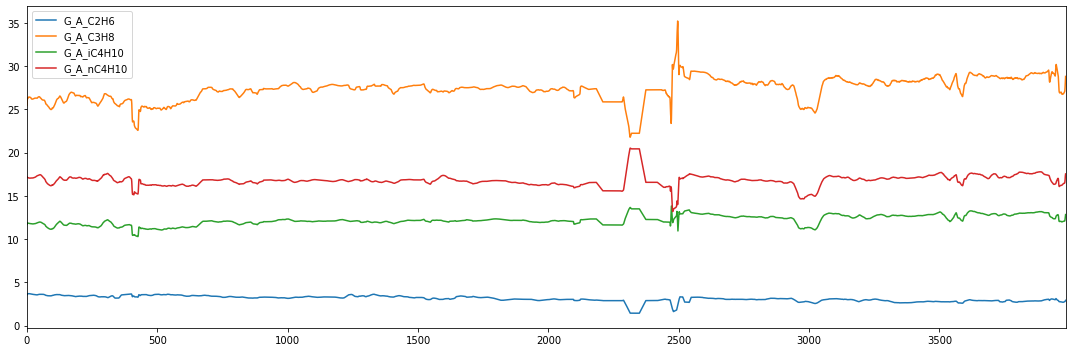

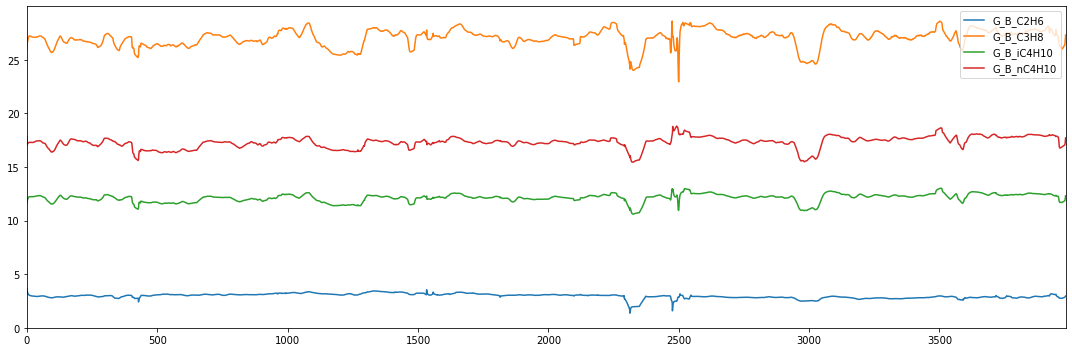

In [1093]:
plt.rcParams["figure.figsize"] = (15,5)

test_data[['G_A_C2H6', 'G_A_C3H8','G_A_iC4H10', 'G_A_nC4H10']][:].plot()

# make room for tick labels
plt.tight_layout()

plt.rcParams["figure.figsize"] = (15,5)

test_data[['G_B_C2H6', 'G_B_C3H8','G_B_iC4H10', 'G_B_nC4H10']][:].plot()

# make room for tick labels
plt.tight_layout()


plt.show()

In [1094]:
predict = pd.DataFrame()

In [1095]:
predict[['timestamp']] = test_data[['timestamp']]

In [1096]:
B = pd.DataFrame({'B_C2H6':[],'B_C3H8':[],'B_iC4H10':[], 'B_nC4H10':[]})

In [1097]:
for i in range(test_data.shape[0]):
    new_line = {}
    B_C2H6 = test_data.loc[i,'G_B_C2H6'] * 100 / test_data.loc[i,'B_rate']
    B_C3H8 = test_data.loc[i,'G_B_C3H8'] * 100 / test_data.loc[i,'B_rate']
    B_iC4H10 = test_data.loc[i,'G_B_iC4H10'] * 100 / test_data.loc[i,'B_rate']
    B_nC4H10 = test_data.loc[i,'G_B_nC4H10'] * 100 / test_data.loc[i,'B_rate']
    
    new_line.update({'B_C2H6':B_C2H6,'B_C3H8':B_C3H8,'B_iC4H10':B_iC4H10,'B_nC4H10': B_nC4H10})
    B = B.append(new_line, ignore_index=True)

In [1098]:
predict = pd.concat([predict,B] , axis=1)

In [1099]:
predict

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-04-30 23:30:00,5.024778,35.786361,16.030659,24.517125
1,2020-05-01 00:00:00,4.690334,35.856106,15.945433,22.933464
2,2020-05-01 00:30:00,4.497515,35.902013,16.084952,23.110452
3,2020-05-01 01:00:00,4.367247,36.123519,16.215833,23.212837
4,2020-05-01 01:30:00,4.284828,36.346278,16.316195,23.273880
...,...,...,...,...,...
3980,2020-07-22 21:30:00,3.991713,37.046002,16.616591,23.937307
3981,2020-07-22 22:00:00,3.993916,37.037238,16.622707,23.942276
3982,2020-07-22 22:30:00,4.006539,37.185593,16.673816,23.944160
3983,2020-07-22 23:00:00,4.023743,37.241831,16.717671,23.964240


In [1100]:
for i in range(0,1):
    predict.drop(i, axis=0, inplace=True)

In [1101]:
predict = predict.reset_index(drop=True)

In [1102]:
predict

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.690334,35.856106,15.945433,22.933464
1,2020-05-01 00:30:00,4.497515,35.902013,16.084952,23.110452
2,2020-05-01 01:00:00,4.367247,36.123519,16.215833,23.212837
3,2020-05-01 01:30:00,4.284828,36.346278,16.316195,23.273880
4,2020-05-01 02:00:00,4.225737,36.516047,16.391790,23.319778
...,...,...,...,...,...
3979,2020-07-22 21:30:00,3.991713,37.046002,16.616591,23.937307
3980,2020-07-22 22:00:00,3.993916,37.037238,16.622707,23.942276
3981,2020-07-22 22:30:00,4.006539,37.185593,16.673816,23.944160
3982,2020-07-22 23:00:00,4.023743,37.241831,16.717671,23.964240


In [1103]:
predict.to_csv('predictRD_-1.csv', sep=',', header=True, index=False)

In [1104]:
a = pd.read_csv('sample_submission.csv', header = 0, sep = ',')
b = pd.read_csv('predictRD_-1.csv', header = 0, sep = ',')

In [1105]:
a

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.363701,37.742757,16.843028,24.171264
1,2020-05-01 00:30:00,4.363701,37.742757,16.843028,24.171264
2,2020-05-01 01:00:00,4.363701,37.742757,16.843028,24.171264
3,2020-05-01 01:30:00,4.363701,37.742757,16.843028,24.171264
4,2020-05-01 02:00:00,4.363701,37.742757,16.843028,24.171264
...,...,...,...,...,...
3979,2020-07-22 21:30:00,4.363701,37.742757,16.843028,24.171264
3980,2020-07-22 22:00:00,4.363701,37.742757,16.843028,24.171264
3981,2020-07-22 22:30:00,4.363701,37.742757,16.843028,24.171264
3982,2020-07-22 23:00:00,4.363701,37.742757,16.843028,24.171264


In [1106]:
b

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.690334,35.856106,15.945433,22.933464
1,2020-05-01 00:30:00,4.497515,35.902013,16.084952,23.110452
2,2020-05-01 01:00:00,4.367247,36.123519,16.215833,23.212837
3,2020-05-01 01:30:00,4.284828,36.346278,16.316195,23.273880
4,2020-05-01 02:00:00,4.225737,36.516047,16.391790,23.319778
...,...,...,...,...,...
3979,2020-07-22 21:30:00,3.991713,37.046002,16.616591,23.937307
3980,2020-07-22 22:00:00,3.993916,37.037238,16.622707,23.942276
3981,2020-07-22 22:30:00,4.006539,37.185593,16.673816,23.944160
3982,2020-07-22 23:00:00,4.023743,37.241831,16.717671,23.964240


In [1107]:
#test_data.to_excel('123.xlsx')